Importing Relevant Python Packages

In [1]:
import tensorflow as tf
import keras 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import os
import datetime
from keras.callbacks import EarlyStopping, TensorBoard
from keras import regularizers

In [2]:
#Importing Garment Worker Productivity Data
filepath = r"C:\Users\User\Downloads\Garment Worker Productivity Prediction Project\garments_worker_productivity.csv"
garment_data = pd.read_csv(filepath)
garment_data.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [3]:
#Finding total unique value for quarter, department and day columns
print(f"Unique value of {garment_data.columns[1]}:{len(np.unique(garment_data.quarter))}")
print(f"Unique value of {garment_data.columns[2]}:{len(np.unique(garment_data.department))}")
print(f"Unique value of {garment_data.columns[3]}:{len(np.unique(garment_data.day))}")

Unique value of quarter:5
Unique value of department:3
Unique value of day:6


In [4]:
#Print the value of the unique values for quarter, department and day columns
print(garment_data.department.unique())
print(garment_data.quarter.unique())
print(garment_data.day.unique())

['sweing' 'finishing ' 'finishing']
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


In [5]:
#Replacing the errors in department column
garment_data['department'] = garment_data['department'].replace(['sweing'],['sewing'])
garment_data['department'] = [string.strip() for string in garment_data.department]

print(garment_data.department.unique())

['sewing' 'finishing']


In [6]:
#print the total null values for every column
print(garment_data.isna().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [7]:
garment_data['wip'] = garment_data['wip'].replace(np.nan, 0)

print(garment_data.isna().sum())

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


In [8]:
#print the shape of the pandas
print(garment_data.shape)

(1197, 15)


In [9]:
#creating new column of month and year for data visualization later
garment_data['date'] = pd.to_datetime(garment_data['date'])

garment_data[['month']] = pd.DataFrame(garment_data.date.dt.month)
# data[['day']] = pd.DataFrame(data.date.dt.day)
#garment_data[['year']] = pd.DataFrame(garment_data.date.dt.year)

In [10]:
#Convert over_time column from using minutes into hours
garment_data['over_time'] = garment_data['over_time'] / 60

garment_data['over_time']

0       118.0
1        16.0
2        61.0
3        61.0
4        32.0
        ...  
1192     16.0
1193     16.0
1194     16.0
1195     30.0
1196     12.0
Name: over_time, Length: 1197, dtype: float64

Instead of evaluating the actual productivity, I'll take the difference of actual and targeted productivity then take the percentage to create new feature margin. This will determine how many percent the actual productivity exceeds the targeted productivity. If actual productivity does not meet the target, margin will be negative.

Positive margin: actual productivity > targeted productivity

Negative margin: actual productivity > targeted productivity

In [11]:
garment_data['margin'] = garment_data['actual_productivity'] - garment_data['targeted_productivity']

garment_data['margin']

0       0.140725
1       0.136500
2       0.000570
3       0.000570
4       0.000382
          ...   
1192   -0.121667
1193   -0.074375
1194   -0.024375
1195   -0.244111
1196   -0.305278
Name: margin, Length: 1197, dtype: float64

In [12]:
garment_data['quarter'] = [int(q[7:]) for q in garment_data.quarter]

garment_data['quarter']

0       1
1       1
2       1
3       1
4       1
       ..
1192    2
1193    2
1194    2
1195    2
1196    2
Name: quarter, Length: 1197, dtype: int64

In [13]:
print(garment_data.quarter.unique())

[1 2 3 4 5]


In [14]:
#print the data type for every column
print(garment_data.dtypes)

date                     datetime64[ns]
quarter                           int64
department                       object
day                              object
team                              int64
targeted_productivity           float64
smv                             float64
wip                             float64
over_time                       float64
incentive                         int64
idle_time                       float64
idle_men                          int64
no_of_style_change                int64
no_of_workers                   float64
actual_productivity             float64
month                             int64
margin                          float64
dtype: object


In [15]:
#Print first 10 rows updated garment_data 
print(garment_data.head(10))

        date  quarter department       day  team  targeted_productivity  \
0 2015-01-01        1     sewing  Thursday     8                   0.80   
1 2015-01-01        1  finishing  Thursday     1                   0.75   
2 2015-01-01        1     sewing  Thursday    11                   0.80   
3 2015-01-01        1     sewing  Thursday    12                   0.80   
4 2015-01-01        1     sewing  Thursday     6                   0.80   
5 2015-01-01        1     sewing  Thursday     7                   0.80   
6 2015-01-01        1  finishing  Thursday     2                   0.75   
7 2015-01-01        1     sewing  Thursday     3                   0.75   
8 2015-01-01        1     sewing  Thursday     2                   0.75   
9 2015-01-01        1     sewing  Thursday     1                   0.75   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0      118.0         98        0.0         0   
1   3.94     0.0       16.0          0        0.

Visualizing data of Garment 

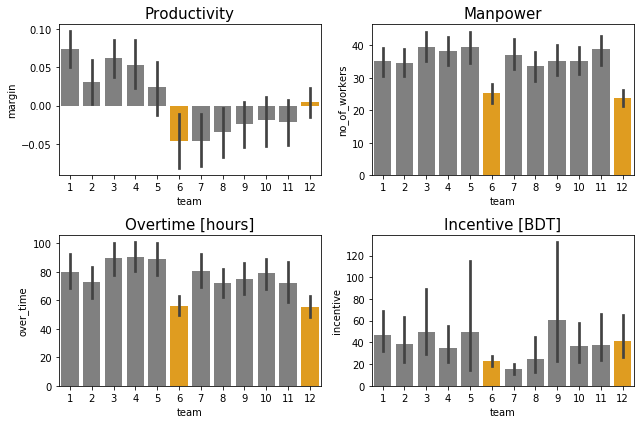

In [16]:
#To visualize the productivity of every teams in term of margin, no of workers, over time and incentive
import seaborn as sns
c = list(np.full(12, 'grey'))
c[5], c[11] = 'orange', 'orange'

f, ax = plt.subplots(2, 2, figsize=(9,6))

sns.barplot(data=garment_data, x='team', y='margin', palette=c, ax=ax[0][0])
ax[0][0].set_title('Productivity', size=15)
sns.barplot(data=garment_data, x='team', y='no_of_workers', palette=c, ax=ax[0][1])
ax[0][1].set_title('Manpower', size=15)
sns.barplot(data=garment_data, x='team', y='over_time', palette=c, ax=ax[1][0])
ax[1][0].set_title('Overtime [hours]', size=15)
sns.barplot(data=garment_data, x='team', y='incentive', palette=c, ax=ax[1][1])
ax[1][1].set_title('Incentive [BDT]', size=15)

plt.tight_layout()

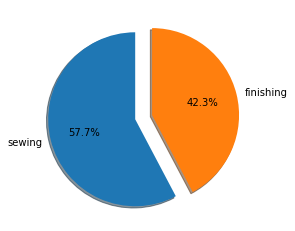

In [17]:
#Pie chart to determnine the total workers in sewing and finishing department
y = np.array([len(garment_data[garment_data['department'] == 'sewing']),
             len(garment_data[garment_data['department'] == 'finishing'])])
mylabels = garment_data.department.unique()
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True,startangle=90, autopct='%1.1f%%')
plt.show() 

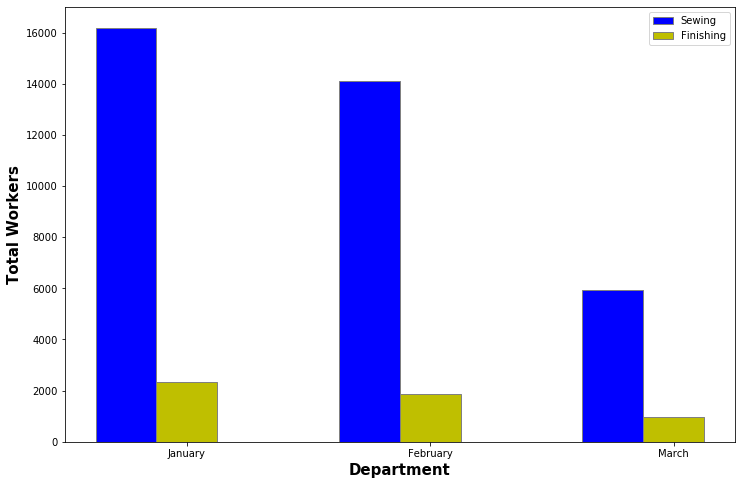

In [18]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
sewing = [garment_data[(garment_data["department"] == "sewing")&(garment_data["month"] == 1)]["no_of_workers"].sum(),
          garment_data[(garment_data["department"] == "sewing")&(garment_data["month"] == 2)]["no_of_workers"].sum(),
          garment_data[(garment_data["department"] == "sewing")&(garment_data["month"] == 3)]["no_of_workers"].sum()]

finishing = [garment_data[(garment_data["department"] == "finishing")&(garment_data["month"] == 1)]["no_of_workers"].sum(),
             garment_data[(garment_data["department"] == "finishing")&(garment_data["month"] == 2)]["no_of_workers"].sum(),
             garment_data[(garment_data["department"] == "finishing")&(garment_data["month"] == 3)]["no_of_workers"].sum()]
 
# Set position of bar on X axis
br1 = np.arange(len(sewing))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, sewing, color ='b', width = barWidth,
        edgecolor ='grey', label ='Sewing')
plt.bar(br2, finishing, color ='y', width = barWidth,
        edgecolor ='grey', label ='Finishing')
 
# Adding Xticks
plt.xlabel('Department', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Workers', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(sewing))],
        ['January', 'February', 'March'])
 
plt.legend()
plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_1732/386963043.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


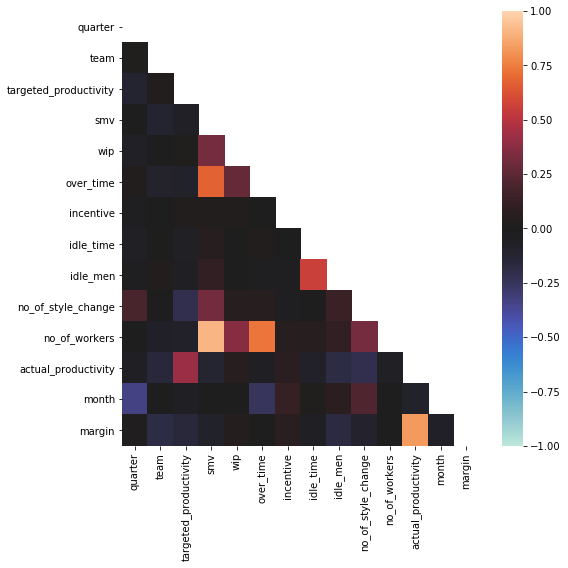

In [19]:
#To visualize the correlation of the data to determine the degree to which two variables are related
def corr_heatmap(df):    
    plt.figure(figsize=(8,8))

    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, cmap='icefire')

corr_heatmap(garment_data)

In [20]:
garment_data.corr()

,quarter,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,margin
quarter,1.000000,0.021038,-0.112319,-0.000105,-0.064439,0.026654,-0.028237,-0.060779,-0.023884,0.189905,-0.005594,-0.051970,-0.333715,0.012037
team,0.021038,1.000000,0.030274,-0.110011,-0.011057,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753,0.000609,-0.180652
targeted_productivity,-0.112319,0.030274,1.000000,-0.069489,0.019035,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594,-0.048426,-0.151971
smv,-0.000105,-0.110011,-0.069489,1.000000,0.322704,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089,-0.001459,-0.090583
wip,-0.064439,-0.011057,0.019035,0.322704,1.000000,0.276529,0.037946,-0.005101,-0.007119,0.053293,0.373908,0.047389,0.004992,0.040014
over_time,0.026654,-0.096737,-0.088557,0.674887,0.276529,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206,-0.244066,-0.004931
incentive,-0.028237,-0.007674,0.032768,0.032629,0.037946,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538,0.118412,0.063387
idle_time,-0.060779,0.003796,-0.056181,0.056863,-0.005101,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851,0.022880,-0.053772
idle_men,-0.023884,0.026974,-0.053818,0.105901,-0.007119,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734,0.077930,-0.165178
no_of_style_change,0.189905,-0.011194,-0.209294,0.315388,0.053293,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366,0.211615,-0.098042


Feature Engineering 

In [21]:
# Change incentive with values of 0 with very small value 0.0001
garment_data.loc[garment_data.incentive==0, 'incentive'] = 0.0001

In [22]:
garment_data.corr()

,quarter,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,margin
quarter,1.000000,0.021038,-0.112319,-0.000105,-0.064439,0.026654,-0.028237,-0.060779,-0.023884,0.189905,-0.005594,-0.051970,-0.333715,0.012037
team,0.021038,1.000000,0.030274,-0.110011,-0.011057,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753,0.000609,-0.180652
targeted_productivity,-0.112319,0.030274,1.000000,-0.069489,0.019035,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594,-0.048426,-0.151971
smv,-0.000105,-0.110011,-0.069489,1.000000,0.322704,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089,-0.001459,-0.090583
wip,-0.064439,-0.011057,0.019035,0.322704,1.000000,0.276529,0.037946,-0.005101,-0.007119,0.053293,0.373908,0.047389,0.004992,0.040014
over_time,0.026654,-0.096737,-0.088557,0.674887,0.276529,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206,-0.244066,-0.004931
incentive,-0.028237,-0.007674,0.032768,0.032629,0.037946,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538,0.118412,0.063387
idle_time,-0.060779,0.003796,-0.056181,0.056863,-0.005101,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851,0.022880,-0.053772
idle_men,-0.023884,0.026974,-0.053818,0.105901,-0.007119,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734,0.077930,-0.165178
no_of_style_change,0.189905,-0.011194,-0.209294,0.315388,0.053293,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366,0.211615,-0.098042


In [23]:
# Feature synthesis
features = ['smv', 'wip', 'incentive', 'no_of_workers', 'over_time', 'no_of_style_change']
garment_data_copy = garment_data.copy()

for f in features:
    # Log
    garment_data_copy[f+'_log'] = garment_data_copy[f].apply(lambda x: np.log10(x) if x>0 else np.log10(x+0.0001))
    # Sqrt
    garment_data_copy[f+'_sqrt'] = garment_data_copy[f].apply(lambda x: np.sqrt(x))
    # Cube root
    garment_data_copy[f+'_cbrt'] = garment_data_copy[f].apply(lambda x: np.cbrt(x))
    # Square
    garment_data_copy[f+'^2'] = garment_data_copy[f].apply(lambda x: x**2)
    # Cube
    garment_data_copy[f+'^3'] = garment_data_copy[f].apply(lambda x: x**3)
    for f2 in features:
        if f==f2:
            pass
        else:
            x, y = garment_data_copy[f], garment_data_copy[f2]
            # Multiply
            garment_data_copy[f+'*'+f2] = x*y
            # Divide
            y = y.apply(lambda c: c if c>0 else c+0.0001)
            garment_data_copy[f+'/'+f2] = x/y
            # Take log of multiplication
            xx = garment_data_copy[f+'*'+f2]
            garment_data_copy[f+'*'+f2+'_log'] = xx.apply(lambda x: np.log10(x) if x>0 else np.log10(x+0.0001))

with pd.option_context('display.max_rows', None): 
    print(garment_data_copy.corr().actual_productivity.apply(lambda x: np.abs(x)).sort_values(ascending=False).head(50))

# incentive*over_time (0.249), no_of_workers/smv (0.157)
# incentive*over_time (0.249), no_of_style_change/no_of_workers (0.21), smv^3 (0.156), smv*no_of_style_change_log (0.233)

actual_productivity                     1.000000
margin                                  0.832182
targeted_productivity                   0.421594
smv/incentive                           0.345815
wip/incentive                           0.343632
no_of_workers/incentive                 0.316310
incentive*over_time                     0.249204
over_time*incentive                     0.249204
no_of_style_change/incentive            0.245870
over_time/incentive                     0.245469
incentive*smv                           0.240965
smv*incentive                           0.240965
no_of_style_change*wip_log              0.233602
wip*no_of_style_change_log              0.233602
no_of_style_change_log                  0.233544
no_of_style_change*smv_log              0.233425
smv*no_of_style_change_log              0.233425
no_of_style_change*no_of_workers_log    0.233334
no_of_workers*no_of_style_change_log    0.233334
over_time*no_of_style_change_log        0.229973
no_of_style_change*o

In [24]:
# Feature engineer smv, manpower, and incentive 
garment_data['smv_manpower'] = np.log(garment_data['smv'] / garment_data['no_of_workers'])
garment_data['log_incentive'] = np.log(garment_data['incentive'])

In [25]:
garment_data.corr()

,quarter,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,margin,smv_manpower,log_incentive
quarter,1.000000,0.021038,-0.112319,-0.000105,-0.064439,0.026654,-0.028237,-0.060779,-0.023884,0.189905,-0.005594,-0.051970,-0.333715,0.012037,0.013847,-0.009624
team,0.021038,1.000000,0.030274,-0.110011,-0.011057,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753,0.000609,-0.180652,-0.063171,0.037141
targeted_productivity,-0.112319,0.030274,1.000000,-0.069489,0.019035,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594,-0.048426,-0.151971,0.000385,0.073480
smv,-0.000105,-0.110011,-0.069489,1.000000,0.322704,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089,-0.001459,-0.090583,0.343385,0.674127
wip,-0.064439,-0.011057,0.019035,0.322704,1.000000,0.276529,0.037946,-0.005101,-0.007119,0.053293,0.373908,0.047389,0.004992,0.040014,0.024777,0.356244
over_time,0.026654,-0.096737,-0.088557,0.674887,0.276529,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206,-0.244066,-0.004931,-0.013728,0.564628
incentive,-0.028237,-0.007674,0.032768,0.032629,0.037946,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538,0.118412,0.063387,-0.049926,0.284663
idle_time,-0.060779,0.003796,-0.056181,0.056863,-0.005101,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851,0.022880,-0.053772,0.014552,-0.036240
idle_men,-0.023884,0.026974,-0.053818,0.105901,-0.007119,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734,0.077930,-0.165178,0.021708,-0.062379
no_of_style_change,0.189905,-0.011194,-0.209294,0.315388,0.053293,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366,0.211615,-0.098042,0.033689,0.126425


Performing training and testing dataset

In [26]:
garment_reg = garment_data.drop(columns=['smv', 'no_of_workers', 'incentive', 'idle_time', 'idle_men',
                       'targeted_productivity', 'margin', 'team', 'date'])

garment_reg

,quarter,department,day,wip,over_time,no_of_style_change,actual_productivity,month,smv_manpower,log_incentive
0,1,sewing,Thursday,1108.0,118.0,0,0.940725,1,-0.813306,4.584967
1,1,finishing,Thursday,0.0,16.0,0,0.886500,1,-0.708261,-9.210340
2,1,sewing,Thursday,968.0,61.0,0,0.800570,1,-0.983237,3.912023
3,1,sewing,Thursday,968.0,61.0,0,0.800570,1,-0.983237,3.912023
4,1,sewing,Thursday,1170.0,32.0,0,0.800382,1,-0.771109,3.912023
...,...,...,...,...,...,...,...,...,...,...
1192,2,finishing,Wednesday,0.0,16.0,0,0.628333,3,-1.014731,-9.210340
1193,2,finishing,Wednesday,0.0,16.0,0,0.625625,3,-0.718465,-9.210340
1194,2,finishing,Wednesday,0.0,16.0,0,0.625625,3,-0.718465,-9.210340
1195,2,finishing,Wednesday,0.0,30.0,0,0.505889,3,-1.643339,-9.210340


In [27]:
# Feature and target
features = garment_reg.drop(columns=['actual_productivity'])
label = garment_reg.actual_productivity

# Encoding
le = LabelEncoder()
categ = ['department', 'day']
features[categ] = features[categ].apply(le.fit_transform)

# Train test split
features_train, features_test, label_train, label_test = train_test_split(features, label, 
                                                                           test_size=0.2, 
                                                                           random_state=12345)

In [28]:
standardizer = StandardScaler()

features_train = standardizer.fit_transform(features_train)
features_test = standardizer.transform(features_test)

In [29]:
print(features_train)

[[-1.15617896  0.8492485   0.25432891 ... -0.97021371  0.34007143
   1.00074659]
 [-0.32984344  0.8492485  -1.48419086 ... -0.97021371 -0.4564521
  -0.99084563]
 [ 1.32282761 -1.17751164  1.4133421  ...  0.37543052  1.04214619
  -0.99084563]
 ...
 [ 1.32282761 -1.17751164  0.25432891 ... -0.97021371 -1.202348
  -0.99084563]
 [-0.32984344 -1.17751164  0.25432891 ... -0.97021371  0.54273182
  -0.99084563]
 [ 1.32282761  0.8492485   1.4133421  ... -0.97021371 -0.11085626
   1.02841769]]


In [30]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.L2(0.001)),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.L2(0.001)),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(32, activation='relu',kernel_regularizer=regularizers.L2(0.001)),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1),
])

In [31]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [32]:
history = model.fit(features_train, label_train, validation_data=(features_test, label_test),
                    batch_size=32, epochs=20)

Epoch 1/20
30/30 [==============================] - 7s 45ms/step - loss: 0.2467 - mae: 0.2430 - val_loss: 0.1740 - val_mae: 0.1555
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1640 - mae: 0.1346 - val_loss: 0.1585 - val_mae: 0.1263
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1503 - mae: 0.1177 - val_loss: 0.1492 - val_mae: 0.1232
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1411 - mae: 0.1139 - val_loss: 0.1395 - val_mae: 0.1159
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1327 - mae: 0.1117 - val_loss: 0.1318 - val_mae: 0.1174
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1251 - mae: 0.1084 - val_loss: 0.1251 - val_mae: 0.1110
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1182 - mae: 0.1073 - val_loss: 0.1201 - val_mae: 0.1194
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1121 - m

In [40]:
# new instances where we do not know the answer
from sklearn.datasets import make_blobs
features_new, _ = make_blobs(n_samples=10, centers=2, n_features=9, random_state=1)
# make a prediction
label_new = model.predict(features_new)
# show the inputs and predicted outputs
for i in range(len(features_new)):
	print("Features=%s, Predicted=%s" % (features_new[i], label_new[i]))

1/1 [==============================] - 0s 45ms/step
X=[-0.5148362   5.30808059 -9.49521816 -3.0524926  -7.74861004 -8.27611833
 -7.21056521 -3.35667354 -1.53429505], Predicted=[2.612997]
X=[ 0.9746344  -1.49710107  3.03372772 -5.53339122  7.68417    -8.32276423
  4.60826808 -1.46874754  0.79851162], Predicted=[1.5141414]
X=[-1.24586654 -1.92231372  4.53236465 -5.68086027  8.32435991 -9.67457628
  3.20859213 -1.46734256  1.58384822], Predicted=[1.782532]
X=[ -0.91751575   4.21465432 -10.88534147  -4.70050684  -5.37242758
  -8.10242035  -6.91179142  -2.89786997   0.03560462], Predicted=[2.5721357]
X=[ -2.35122066   4.00973634 -10.6848852   -4.79855419  -7.73612831
  -8.1658927   -7.39210612  -2.85436976  -0.40484834], Predicted=[2.6983178]
X=[-1.53940095  5.02369298 -9.69754218 -4.30559839 -8.20740038 -8.50257083
 -6.48369001 -2.50216227 -1.2256671 ], Predicted=[2.6479084]
X=[ 1.70743676 -1.33052239  4.58953117 -6.66535295  8.81521688 -8.93931832
  3.11125737 -1.16538581  1.09822486], Pr